Here are the full forms and explanations of each variable:

- crim: Crime rate: This variable represents the per capita crime rate by town.
- zn: Proportion of residential land zoned for lots over 25,000 sq.ft.: This variable represents the proportion of land in - each town that is zoned for residential use and is greater than 25,000 square feet in size.
- indus: Proportion of non-retail business acres per town: This variable represents the proportion of non-retail business acres per town.
- chas: Charles River dummy variable: This variable is a dummy variable that takes on the value of 1 if the tract bounds the Charles River and 0 otherwise.
- nox: Nitrogen oxides concentration: This variable represents the concentration of nitrogen oxides (in parts per 10 million) in the air in each town.
- rm: Average number of rooms per dwelling: This variable represents the average number of rooms per dwelling in each town.
- age: Proportion of owner-occupied units built prior to 1940: This variable represents the proportion of owner-occupied units in each town that were built prior to 1940.
- dis: Weighted distances to five Boston employment centers: This variable represents the weighted distance (in miles) from each town to the five employment centers in Boston.
- rad: Index of accessibility to radial highways: This variable represents an index of how accessible each town is to the radial highways in Boston.
- tax: Full-value property-tax rate per $10,000: This variable represents the full-value property-tax rate per $10,000 of assessed value in each town.
- ptratio: Pupil-teacher ratio by town: This variable represents the average pupil-teacher ratio in the schools in each town.
- b: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town: This variable represents a measure of the proportion of black residents in
- lstat: lower status of the population (percent)
- medv: median value of owner-occupied homes in $1000s (target variable)

Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [ ]:
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1. Correlation

<AxesSubplot:>

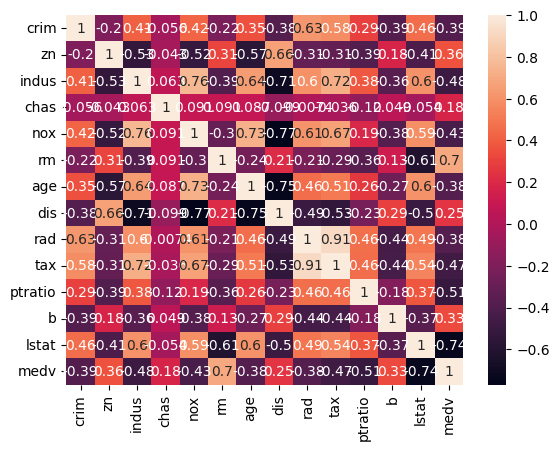

In [12]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')

## VIF

In [14]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 5.5 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(13):
    vif.append(variance_inflation_factor(df.iloc[:,1:14], i))

In [16]:
pd.DataFrame({'vif': vif}, index=df.columns[1:14]).T

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
vif,2.877684,14.461633,1.175166,73.920376,134.753271,21.398339,15.193886,14.24837,61.920251,87.226675,21.245214,12.413615,24.146461


    feature         VIF
0      crim    2.131404
1        zn    2.910004
2     indus   14.485874
3      chas    1.176266
4       nox   74.004269
5        rm  136.101743
6       age   21.398863
7       dis   15.430455
8       rad   15.369980
9       tax   61.939713
10  ptratio   87.227233
11        b   21.351015
12    lstat   12.615188
13     medv   24.503206


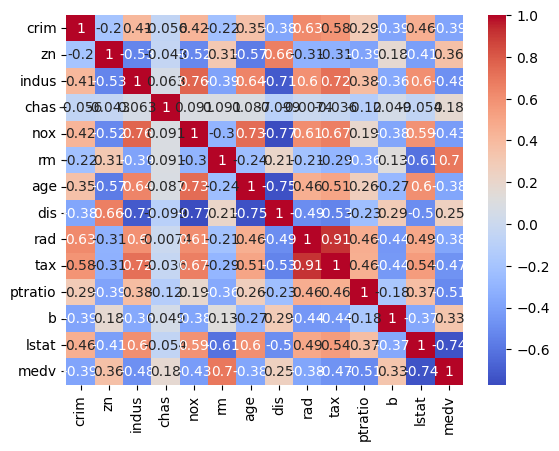

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Compute the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a new DataFrame for the VIF
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# Print the VIF for each feature
print(vif_data)


# Solutions

In [21]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# Remove highly correlated variables
df = df.drop(['indus', 'tax', 'ptratio', 'nox', 'rm','b'], axis=1)

# Compute the VIF for each remaining variable
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# Print the VIF for each feature
print(vif_data)

# Fit an OLS regression model
X = df.drop(['medv'], axis=1)
y = df['medv']
model = OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


  feature        VIF
0    crim   2.087367
1      zn   2.393174
2    chas   1.139416
3     age  14.290573
4     dis   6.423463
5     rad   4.166760
6   lstat   9.630931
7    medv   8.384521
                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              526.4
Date:                Wed, 10 May 2023   Prob (F-statistic):                   8.58e-226
Time:                        12:32:43   Log-Likelihood:                         -1795.1
No. Observations:                 506   AIC:                                      3604.
Df Residuals:                     499   BIC:                                      3634.
Df Model:                           7                                                  
Covariance Type:   

# PCA

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# Separate the target variable
y = df.pop('medv').values

# Standardize the data
X = (df - df.mean()) / df.std()

# Perform PCA to extract the principal components
pca = PCA()
X_pca = pca.fit_transform(X)

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

# Use the first few principal components as predictors
X_pca = X_pca[:, :5]

# Fit a linear regression model
model = LinearRegression().fit(X_pca, y)

# Print the R-squared value for the model
print('R-squared:', model.score(X_pca, y))


[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]
R-squared: 0.6969794221303116


Here, we first separate the target variable (medv) from the rest of the data and standardize the data. We then perform PCA on the standardized data to extract the principal components. We print the explained variance ratio for each component to see how much variance is explained by each component. We use the first five principal components as predictors in a linear regression model, and fit the model using scikit-learn's LinearRegression class. Finally, we print the R-squared value for the model.

By using principal components as predictors in the regression model, we have reduced the multicollinearity among the original variables. However, note that this approach comes with the cost of interpretability, as it can be difficult to understand the relationship between the principal components and the original variables.